# pulled initial_cleanup.ipynb

added datasets 
managers_csv = "archive/Managers.csv"
awardsplayers_csv = "archive/AwardsPlayers.csv"

#made minor changes to 
master_csv = "archive/Master.csv"
batting_csv = "archive/Batting.csv"

# on awardsplayers_csv = "archive/AwardsPlayers.csv"
*Clean dataset.
*Group players, look for the mean, median, Variance and Standard deviation on Bats, Runs, Hits etc….
*Used the pearson method to calculate the correlation.
*sort awards by categories to find winners in each category, since 1999.
*Sort players to find number of award won by each player, since 1999.

# managers_csv = "archive/Managers.csv"
*clean dataset.
*sort managers by wins( to be completed)***


In [257]:
# dependencies
import pandas as pd
import seaborn as sn
import pingouin as pg
import matplotlib.pyplot as plt
import numpy as np

master_csv = "archive/Master.csv"
batting_csv = "archive/Batting.csv"
managers_csv = "archive/Managers.csv"
awardsplayers_csv = "archive/AwardsPlayers.csv"

In [258]:
awardsplayers_df = pd.read_csv (awardsplayers_csv)
managers_df = pd.read_csv(managers_csv)
master_df = pd.read_csv(master_csv)
#master_df.head()
batting_df = pd.read_csv(batting_csv)
batting_df.head()

#filter batting df
filtered_batting_df = batting_df.loc[batting_df['yearID'] > 1999]
filtered_batting_df

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
79248,abbotje01,2000,1,CHA,AL,80,215.0,31.0,59.0,15.0,...,29.0,2.0,1.0,21.0,38.0,1.0,2.0,2.0,1.0,2.0
79249,abbotku01,2000,1,NYN,NL,79,157.0,22.0,34.0,7.0,...,12.0,1.0,1.0,14.0,51.0,2.0,1.0,0.0,1.0,2.0
79250,abbotpa01,2000,1,SEA,AL,35,5.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
79251,abreubo01,2000,1,PHI,NL,154,576.0,103.0,182.0,42.0,...,79.0,28.0,8.0,100.0,116.0,9.0,1.0,0.0,3.0,12.0
79252,aceveju01,2000,1,MIL,NL,62,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [259]:
#sort players by runs or  you could replace "R" by any value 
players_runs = filtered_batting_df.loc [(filtered_batting_df["R"] >=100)]
players_runs = players_runs.set_index('playerID')
players_runs.head(20)

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
abreubo01,2000,1,PHI,NL,154,576.0,103.0,182.0,42.0,10.0,...,79.0,28.0,8.0,100.0,116.0,9.0,1.0,0.0,3.0,12.0
alfoned01,2000,1,NYN,NL,150,544.0,109.0,176.0,40.0,2.0,...,94.0,3.0,2.0,95.0,70.0,1.0,5.0,0.0,6.0,12.0
alomaro01,2000,1,CLE,AL,155,610.0,111.0,189.0,40.0,2.0,...,89.0,39.0,4.0,64.0,82.0,4.0,6.0,11.0,6.0,19.0
bagweje01,2000,1,HOU,NL,159,590.0,152.0,183.0,37.0,1.0,...,132.0,9.0,6.0,107.0,116.0,11.0,15.0,0.0,7.0,19.0
benarma01,2000,1,SFN,NL,149,560.0,102.0,147.0,27.0,6.0,...,55.0,22.0,7.0,63.0,97.0,0.0,6.0,2.0,2.0,4.0
bondsba01,2000,1,SFN,NL,143,480.0,129.0,147.0,28.0,4.0,...,106.0,11.0,3.0,117.0,77.0,22.0,3.0,0.0,7.0,6.0
castilu01,2000,1,FLO,NL,136,539.0,101.0,180.0,17.0,3.0,...,17.0,62.0,22.0,78.0,86.0,0.0,0.0,9.0,0.0,11.0
cirilje01,2000,1,COL,NL,157,598.0,111.0,195.0,53.0,2.0,...,115.0,3.0,4.0,67.0,72.0,4.0,6.0,1.0,12.0,19.0
damonjo01,2000,1,KCA,AL,159,655.0,136.0,214.0,42.0,10.0,...,88.0,46.0,9.0,65.0,60.0,4.0,1.0,8.0,12.0,7.0


In [260]:
merged_df = pd.merge(master_df, filtered_batting_df, on='playerID', how = "inner" )
merged_df.head()
#df.to_csv('df.csv')
merged_df.fillna(0)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22079,zumayjo01,1984.0,11.0,9.0,USA,CA,Chula Vista,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22080,zuninmi01,1991.0,3.0,25.0,USA,FL,Cape Coral,0.0,0.0,0.0,...,14.0,1.0,0.0,16.0,49.0,0.0,3.0,0.0,1.0,5.0
22081,zuninmi01,1991.0,3.0,25.0,USA,FL,Cape Coral,0.0,0.0,0.0,...,60.0,0.0,3.0,17.0,158.0,1.0,17.0,0.0,4.0,12.0
22082,zuninmi01,1991.0,3.0,25.0,USA,FL,Cape Coral,0.0,0.0,0.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [261]:
# drop columns
merged_df = merged_df.drop(['birthDay',
                            'birthMonth',
                            'deathDay',
                            'deathMonth',
                            'deathCountry',
                            'deathState',
                            'deathCity',
                            'weight',
                            'height',
                            'nameFirst',
                            'nameLast',
                            'bats',
                            'throws' 
                           ], axis=1)

merged_df

,playerID,birthYear,birthCountry,birthState,birthCity,deathYear,nameGiven,debut,finalGame,retroID,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22079,zumayjo01,1984.0,USA,CA,Chula Vista,NaN,Joel Martin,4/3/06,6/28/10,zumaj001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22080,zuninmi01,1991.0,USA,FL,Cape Coral,NaN,Michael Accorsi,6/12/13,8/27/15,zunim001,...,14.0,1.0,0.0,16.0,49.0,0.0,3.0,0.0,1.0,5.0
22081,zuninmi01,1991.0,USA,FL,Cape Coral,NaN,Michael Accorsi,6/12/13,8/27/15,zunim001,...,60.0,0.0,3.0,17.0,158.0,1.0,17.0,0.0,4.0,12.0
22082,zuninmi01,1991.0,USA,FL,Cape Coral,NaN,Michael Accorsi,6/12/13,8/27/15,zunim001,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [262]:
# rename headers to make them neat
merged_df = merged_df.rename(columns={'playerID': 'Player ID',
                                      'birthYear': 'Birth Year',
                                      'birthCountry': 'Birth Country',
                                      'birthState': 'Birth State',
                                      'birthCity': 'Birth City',
                                      'deathYear': 'Death Year',
                                      'nameGiven': 'Full Name',
                                      'weight': 'Weight',
                                      'height': 'Height',
                                      'bats': 'Bats',
                                      'throws': 'Throws',
                                      'debut': 'Debut Date',
                                      'finalGame': 'Date of Last Game',
                                      'retroID': 'Retro ID',
                                      'bbrefID': 'BBRef ID',
                                       'AB': 'At Bats',
                                      'R': 'Runs',
                                      'H': 'Hits',
                                      '2B': 'Doubles',
                                      '3B': 'Triples',
                                      'HR': 'Homeruns',
                                      'RBI': 'Runs Batted In',
                                      'SB': 'Stolen Bases',
                                      'CS': 'Caught Stealing',
                                      'BB': 'Base on balls',
                                       'SO': 'Strike Outs',
                                      'IBB': 'Intentional Walks',
                                      'HBP': 'Hits By Pitch',
                                      'SH': 'Sacrifices',
                                      'SF': 'Sacrifice Files',
                                      'GIDP': 'Grounded into Double Plays'
                                
                                      
                                     })
merged_df

,Player ID,Birth Year,Birth Country,Birth State,Birth City,Death Year,Full Name,Debut Date,Date of Last Game,Retro ID,...,Runs Batted In,Stolen Bases,Caught Stealing,Base on balls,Strike Outs,Intentional Walks,Hits By Pitch,Sacrifices,Sacrifice Files,Grounded into Double Plays
0,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,1981.0,USA,CO,Denver,NaN,David Allan,4/6/04,8/23/15,aardd001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22079,zumayjo01,1984.0,USA,CA,Chula Vista,NaN,Joel Martin,4/3/06,6/28/10,zumaj001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22080,zuninmi01,1991.0,USA,FL,Cape Coral,NaN,Michael Accorsi,6/12/13,8/27/15,zunim001,...,14.0,1.0,0.0,16.0,49.0,0.0,3.0,0.0,1.0,5.0
22081,zuninmi01,1991.0,USA,FL,Cape Coral,NaN,Michael Accorsi,6/12/13,8/27/15,zunim001,...,60.0,0.0,3.0,17.0,158.0,1.0,17.0,0.0,4.0,12.0
22082,zuninmi01,1991.0,USA,FL,Cape Coral,NaN,Michael Accorsi,6/12/13,8/27/15,zunim001,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [263]:
# use group method to group players by player id, get 'mean', 'median','variance', 'standard deviation'

group_players_df = merged_df.groupby('Player ID').agg({'At Bats': ['mean','median','var','std'],'Runs': ['mean','median','var','std'],'Hits': ['mean','median','var','std'],'Doubles': ['mean','median','var','std'],
                                                    'Triples': ['mean','median','var','std'],'Homeruns': ['mean','median','var','std'],'Runs Batted In': ['mean','median','var','std'],'Stolen Bases': ['mean','median','var','std'],
                                                    'Caught Stealing': ['mean','median','var','std'],'Base on balls': ['mean','median','var','std'],'Strike Outs': ['mean','median','var','std'],'Intentional Walks': ['mean','median','var','std'],
                                                    'Hits By Pitch': ['mean','median','var','std'],'Sacrifices': ['mean','median','var','std'],'Sacrifice Files': ['mean','median','var','std'],'Grounded into Double Plays': ['mean','median','var','std'],
                                                   })
group_players_df.head(10)

At Bats                                        Runs         \
                 mean median           var         std       mean median   
Player ID                                                                  
aardsda01    0.444444    0.0      0.527778    0.726483   0.000000    0.0   
abadan01     7.000000    3.0     76.000000    8.717798   0.333333    0.0   
abadfe01     1.333333    0.0      7.866667    2.804758   0.000000    0.0   
abbotje01  128.500000  128.5  14964.500000  122.329473  18.000000   18.0   
abbotku01   83.000000   83.0  10952.000000  104.651804  11.000000   11.0   
abbotpa01    3.333333    2.0     19.066667    4.366539   0.333333    0.0   
abercre01  128.666667   76.0  12080.333333  109.910570  21.666667   16.0   
abernbr01  173.600000   67.0  40341.800000  200.852682  19.400000    5.0   
abreubo01  451.687500  572.5  39840.495833  199.600841  77.750000   97.5   
abreujo02  584.500000  584.5   1624.500000   40.305087  84.000000   84.0   

                                         Hits         ... Sacrifices  \
                   var        std        mean median  ...        var   
Player ID                                             ...              
aardsda01     0.000000   0.000000    0.000000    0.0  ...   0.111111   
abadan01      0.333333   0.577350    0.666667    0.0  ...   0.000000   
abadfe01      0.000000   0.000000    0.166667    0.0  ...   0.000000   
abbotje01   338.000000  18.384776   35.000000   35.0  ...   2.000000   
abbotku01   242.000000  15.556349   18.000000   18.0  ...   0.000000   
abbotpa01     0.266667   0.516398    0.833333    0.5  ...   1.366667   
abercre01   234.333333  15.307950   28.666667   17.0  ...   4.333333   
abernbr01   528.300000  22.984778   42.400000   16.0  ...   8.700000   
abreubo01  1585.400000  39.817082  130.000000  166.5  ...   0.295833   
abreujo02    32.000000   5.656854  177.000000  177.0  ...   0.000000   

                    Sacrifice Files                             \
                std            mean median       var       std   
Player ID                                                        
aardsda01  0.333333        0.000000    0.0  0.000000  0.000000   
abadan01   0.000000        0.000000    0.0  0.000000  0.000000   
abadfe01   0.000000        0.000000    0.0  0.000000  0.000000   
abbotje01  1.414214        0.500000    0.5  0.500000  0.707107   
abbotku01  0.000000        0.500000    0.5  0.500000  0.707107   
abbotpa01  1.169045        0.000000    0.0  0.000000  0.000000   
abercre01  2.081666        0.666667    1.0  0.333333  0.577350   
abernbr01  2.949576        0.800000    1.0  0.700000  0.836660   
abreubo01  0.543906        4.812500    5.5  8.829167  2.971391   
abreujo02  0.000000        2.500000    2.5  4.500000  2.121320   

          Grounded into Double Plays                              
                                mean median        var       std  
Player ID                                                         
aardsda01                   0.000000    0.0   0.000000  0.000000  
abadan01                    0.333333    0.0   0.333333  0.577350  
abadfe01                    0.166667    0.0   0.166667  0.408248  
abbotje01                   1.500000    1.5   0.500000  0.707107  
abbotku01                   1.000000    1.0   2.000000  1.414214  
abbotpa01                   0.000000    0.0   0.000000  0.000000  
abercre01                   1.000000    1.0   1.000000  1.000000  
abernbr01                   3.000000    2.0   9.000000  3.000000  
abreubo01                   9.062500    9.5  18.195833  4.265657  
abreujo02                  15.000000   15.0   2.000000  1.414214  

[10 rows x 64 columns]

In [264]:
# using the pearson correlation method
pgroup_players_df = merged_df.corr(method='pearson')
pgroup_players_df

,Birth Year,Death Year,yearID,stint,G,At Bats,Runs,Hits,Doubles,Triples,...,Runs Batted In,Stolen Bases,Caught Stealing,Base on balls,Strike Outs,Intentional Walks,Hits By Pitch,Sacrifices,Sacrifice Files,Grounded into Double Plays
Birth Year,1.000000,0.296301,0.749750,-0.083705,-0.102358,-0.057794,-0.071672,-0.062979,-0.061902,0.009550,...,-0.083032,0.011172,-0.011909,-0.093866,-0.004628,-0.081133,-0.056517,-0.031549,-0.083195,-0.077442
Death Year,0.296301,1.000000,0.441769,-0.080847,0.036366,0.002203,0.013649,0.008334,-0.012733,0.026202,...,-0.144734,0.098494,0.128077,-0.054243,-0.096682,-0.137972,0.132679,0.060874,-0.019125,-0.068835
yearID,0.749750,0.441769,1.000000,-0.011624,-0.019319,-0.017329,-0.046393,-0.027735,-0.030637,-0.019243,...,-0.044989,-0.006711,-0.034951,-0.041671,0.026528,-0.040232,-0.033431,-0.042405,-0.037840,-0.023289
stint,-0.083705,-0.080847,-0.011624,1.000000,-0.156087,-0.108967,-0.101998,-0.105313,-0.102977,-0.065645,...,-0.097981,-0.060417,-0.065615,-0.095324,-0.103663,-0.069388,-0.079796,-0.073865,-0.085290,-0.093828
G,-0.102358,0.036366,-0.019319,-0.156087,1.000000,0.916092,0.885719,0.904987,0.876192,0.610110,...,0.863287,0.551175,0.616391,0.829558,0.850820,0.540418,0.656994,0.262640,0.754607,0.805504
At Bats,-0.057794,0.002203,-0.017329,-0.108967,0.916092,1.000000,0.969218,0.991153,0.958004,0.667626,...,0.940836,0.614509,0.676541,0.891475,0.920159,0.575467,0.709760,0.286188,0.820166,0.880679
Runs,-0.071672,0.013649,-0.046393,-0.101998,0.885719,0.969218,1.000000,0.977410,0.949520,0.678440,...,0.949087,0.644036,0.682508,0.920749,0.894516,0.612164,0.713671,0.237643,0.804017,0.833302
Hits,-0.062979,0.008334,-0.027735,-0.105313,0.904987,0.991153,0.977410,1.000000,0.965664,0.673169,...,0.947748,0.622138,0.677872,0.888805,0.889893,0.596497,0.704770,0.257385,0.819801,0.877449
Doubles,-0.061902,-0.012733,-0.030637,-0.102977,0.876192,0.958004,0.949520,0.965664,1.000000,0.614644,...,0.937762,0.550472,0.615322,0.875877,0.874479,0.594719,0.689428,0.207166,0.812339,0.857147
Triples,0.009550,0.026202,-0.019243,-0.065645,0.610110,0.667626,0.678440,0.673169,0.614644,1.000000,...,0.563636,0.675542,0.664786,0.554732,0.593027,0.301077,0.430497,0.295008,0.496060,0.479928


In [265]:
managers_df = pd.read_csv(managers_csv)
managers_df.head()
managers_df.fillna(0)

,playerID,yearID,teamID,lgID,inseason,G,W,L,rank,plyrMgr
0,wrighha01,1871,BS1,0,1,31,20,10,3.0,Y
1,woodji01,1871,CH1,0,1,28,19,9,2.0,Y
2,paborch01,1871,CL1,0,1,29,10,19,8.0,Y
3,lennobi01,1871,FW1,0,1,14,5,9,8.0,Y
4,deaneha01,1871,FW1,0,2,5,2,3,8.0,Y
...,...,...,...,...,...,...,...,...,...,...
3400,roberda07,2015,SDN,NL,2,1,0,1,4.0,N
3401,murphpa99,2015,SDN,NL,3,96,42,54,4.0,N
3402,bochybr01,2015,SFN,NL,1,162,84,78,2.0,N
3403,mathemi01,2015,SLN,NL,1,162,100,62,1.0,N


In [266]:
filtered_managers_df = managers_df.loc[managers_df['yearID'] > 1999]
filtered_managers_df

,playerID,yearID,teamID,lgID,inseason,G,W,L,rank,plyrMgr
2863,sciosmi01,2000,ANA,AL,1,162,82,80,3.0,N
2864,hargrmi01,2000,BAL,AL,1,162,74,88,4.0,N
2865,williji03,2000,BOS,AL,1,162,85,77,2.0,N
2866,manueje01,2000,CHA,AL,1,162,95,67,1.0,N
2867,manuech01,2000,CLE,AL,1,162,90,72,2.0,N
...,...,...,...,...,...,...,...,...,...,...
3400,roberda07,2015,SDN,NL,2,1,0,1,4.0,N
3401,murphpa99,2015,SDN,NL,3,96,42,54,4.0,N
3402,bochybr01,2015,SFN,NL,1,162,84,78,2.0,N
3403,mathemi01,2015,SLN,NL,1,162,100,62,1.0,N


In [267]:
managers_p = filtered_managers_df['G']
managers_w = filtered_managers_df['W']
correlation =managers_p.corr(managers_w)
print(correlation)

0.9047908952683104


In [268]:
# identify managers with more than 100wins from 1980
managers_wins = filtered_managers_df.loc [(filtered_managers_df["W"] >=100)]
managers_wins = managers_wins.set_index('playerID')
managers_wins.head()
# Clean DF
managers_wins = managers_wins.drop(['plyrMgr',
                                   ], axis=1)

managers_wins

managers_wins = managers_wins.rename(columns={'playerID': 'playerID',
                                      'teamID': 'Team ID',
                                      'yearID': 'Year',
                                      'lgID': 'League',
                                     'inseason':'No of Seasons',
                                    'G':'Games',
                                    'W': 'Wins',
                                              'L': 'Losses',
                                              'rank':'Player Rank'
                                    
                                     })
managers_wins


,Year,Team ID,League,No of Seasons,Games,Wins,Losses,Player Rank
playerID,,,,,,,,
howear01,2001,OAK,AL,1,162,102,60,2.0
pinielo01,2001,SEA,AL,1,162,116,46,1.0
torrejo01,2002,NYA,AL,1,161,103,58,1.0
howear01,2002,OAK,AL,1,162,103,59,1.0
coxbo01,2002,ATL,NL,1,161,101,59,1.0
torrejo01,2003,NYA,AL,1,163,101,61,1.0
coxbo01,2003,ATL,NL,1,162,101,61,1.0
aloufe01,2003,SFN,NL,1,161,100,61,1.0
torrejo01,2004,NYA,AL,1,162,101,61,1.0


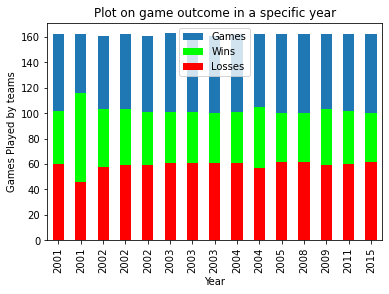

In [269]:
ax = plt.gca()
managers_wins.plot(kind='bar', x='Year', y='Games',label="Games", ax=ax)
managers_wins.plot(kind='bar', x='Year', y='Wins',color='Lime',label="Wins", ax=ax)
managers_wins.plot(kind='bar', x='Year', y='Losses',color='red',label="Losses", ax=ax)
plt.title('Plot on game outcome in a specific year')
plt.xlabel('Year')
plt.ylabel('Games Played by teams')
plt.show()




In [270]:
#managers_total_wins = managers_wins.groupby(['playerID'], as_index=True).sum()

In [271]:
awardsplayers_df = pd.read_csv(awardsplayers_csv)
awardsplayers_df.head()
sort_awardsplayers_df = awardsplayers_df.loc[awardsplayers_df['yearID'] > 1999]
sort_awardsplayers_df

sort_awardsplayers_df = sort_awardsplayers_df.drop(['lgID',
                            'notes',
 
                           ], axis=1)

sort_awardsplayers_df

sort_awardsplayers_df = sort_awardsplayers_df.rename(columns={'playerID': 'Player',
                                      'awardID': 'Award',
                                      'yearID': 'Year',
                                      'tie': 'Tie',                      
                                     })
sort_awardsplayers_df

,Player,Award,Year,Tie
4957,justida01,ALCS MVP,2000,NaN
4958,jeterde01,All-Star Game MVP,2000,NaN
4959,jeterde01,Babe Ruth Award,2000,NaN
4960,stottto01,Branch Rickey Award,2000,NaN
4961,martipe02,Cy Young Award,2000,NaN
...,...,...,...,...
6073,mccutan01,Silver Slugger,2015,NaN
6074,bumgama01,Silver Slugger,2015,NaN
6075,crawfbr01,Silver Slugger,2015,NaN
6076,donaljo02,TSN Major League Player of the Year,2015,NaN


In [272]:
sort_awardsplayers_df['Tie'] = sort_awardsplayers_df['Tie'].fillna(0)# remove 'NaN' and replace with'0' in column "Tie"
sort_awardsplayers_df

,Player,Award,Year,Tie
4957,justida01,ALCS MVP,2000,0
4958,jeterde01,All-Star Game MVP,2000,0
4959,jeterde01,Babe Ruth Award,2000,0
4960,stottto01,Branch Rickey Award,2000,0
4961,martipe02,Cy Young Award,2000,0
...,...,...,...,...
6073,mccutan01,Silver Slugger,2015,0
6074,bumgama01,Silver Slugger,2015,0
6075,crawfbr01,Silver Slugger,2015,0
6076,donaljo02,TSN Major League Player of the Year,2015,0


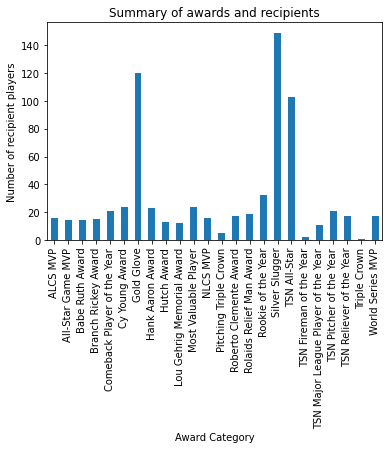

In [273]:
plt_sort_awardsplayers_df= sort_awardsplayers_df.groupby('Award')['Player'].nunique().plot(kind='bar')
plt.title('Summary of awards and recipients')
plt.xlabel('Award Category')
plt.ylabel('Number of recipient players')
plt.show()

In [274]:
#group_playersby_awards = sort_awardsplayers_df.groupby('Award').count()
#group_playersby_awards


In [275]:
#sort_awardsplayers_df.sort_values(['Award'])
#sort_awardsplayers_df.head()

In [276]:
sort_awardsplayers_df.Award.value_counts(ascending=True)# gives an idea of the number of awards given out since 1999 based on category

Triple Crown                             1
TSN Fireman of the Year                  2
Pitching Triple Crown                    5
Lou Gehrig Memorial Award               12
Hutch Award                             13
Babe Ruth Award                         14
All-Star Game MVP                       15
Branch Rickey Award                     15
TSN Major League Player of the Year     16
NLCS MVP                                16
ALCS MVP                                16
World Series MVP                        17
Roberto Clemente Award                  17
TSN Reliever of the Year                20
Comeback Player of the Year             22
Rolaids Relief Man Award                26
TSN Pitcher of the Year                 27
Rookie of the Year                      32
Hank Aaron Award                        32
Cy Young Award                          32
Most Valuable Player                    32
TSN All-Star                           161
Silver Slugger                         289
Gold Glove 

In [277]:
sort_awardsplayers_df.Player.value_counts(ascending=False).head(10)# Players with the most awards


rodrial01    25
pujolal01    23
bondsba01    19
suzukic01    19
jeterde01    19
cabremi01    14
ortizda01    14
ramirma02    14
guerrvl01    13
hunteto01    13
Name: Player, dtype: int64